In [161]:
#Importing Data from the CSV file
import os
import numpy as np
import random
import matplotlib.pyplot as plt

os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q2")
print("Path has been changed to:\n", os.getcwd())

#Importing Data X from the CSV file
temp = np.genfromtxt('q2test.csv', delimiter=',')
#print(temp[1:])

X1_test = temp[1:, 0].reshape(-1,1)
X2_test = temp[1:, 1].reshape(-1,1)
Y_test = temp[1:, 2].reshape(-1,1)
X0_test = np.ones((X1_test.shape))
X_test = np.append(X0_test, X1_test, axis=1)
X_test = np.append(X_test, X2_test, axis=1)

num_test = X_test.shape[0]
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques2")
print("Path changed back to python file directory:\n", os.getcwd())

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q2
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques2


In [2]:
#given as input
m = 1000000
x0 = np.ones((m,1)) #Intercept term

#Sample X1 ~ N(3,4) and sample X2 ~ N(-1, 4)
x1 = np.random.normal(3, 2, m).reshape(-1,1)
x2 = np.random.normal(-1, 2, m).reshape(-1,1)

#Make a 1Mx3 matrix
X = np.append(x0,x1,axis=1)
X = np.append(X, x2, axis=1)
print("The number of training samples to be generated is {}".format(m))

The number of training samples is to be generated is 1000000


In [5]:
#Sample epsilon error in the data from N(0, 2)
epsilon = np.random.normal(0, np.sqrt(2), m).reshape(-1,1)

#Theta is fixed with values 3, 1, 2 for generating the data. 
#We will later use these parameters to vr=erify our hypothesis from SGD. 
theta = np.array([[3], [1], [2]])

In [6]:
#Generate the value of Y (given X, parameterized by given Theta)
Y = np.dot(X,theta) + epsilon

In [7]:
#Data is (X, Y)
#Randomly shuffle the data
temp = np.append(X, Y, axis=1)
#We use random shuffle from numpy to shuffle all the rows of the data
np.random.shuffle(temp)
X = temp[:,0:3]
Y = temp[:,-1:]

In [230]:
#Applying SGD on X, Y to learn hypothesis with parameters theta

#Model Initial Parameters initialized to zeros
theta = np.zeros((3,1))
#Learning Rate (has to be fixed)
alpha = 0.001 

#Batch Size r options stored in an array 
batch_size = np.array([1, 100, 10000, 1000000])

print("The model's initial theta is = {} and the learning rate is = {}".format(theta.T, alpha))

The model's initial theta is = [[0. 0. 0.]] and the learning rate is = 0.001


In [231]:
#define the hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

#Define the cost function over the entire sample/batch
def cost_total(X, theta, Y, m):
    h_x= hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((Y-h_x)**2) # Average Cost Function
    return cost

#function for calculating the cost function gradient
def cost_grad(X, theta, Y, m):
    temp = np.dot(X, theta)-Y
    theta_grad = np.zeros((3,1))
    theta_grad += np.dot(X.transpose(), temp)
    return theta_grad/m #average Gradient 
    
cost_start = cost_total(X, theta, Y, m)
print("Initial Cost value for the hypothesis with zero parameters={}".format(cost_start))

Initial Cost value for the hypothesis with zero parameters=19.006779488830777


In [232]:
#r is the current batch size (choose between 1, 100, 10000, 1000000 - defined in batch_size array)
r = batch_size[1]

#number of batches (sub batches stored in an array mini_batch)
mini_batch = [(X[i:i+r,:], Y[i:i+r]) for i in range(0, m, r)]
print("The size of one batch is = {} and the number of batches = {}".format(r, len(mini_batch)))
#for b in mini_batch: print(b[1])

The size of one batch is = 100 and the number of batches = 10000


In [233]:
import time
start = time.time()

i=0   #Variable for outer loop
J_curr=0.0; #Store the current cost at one (r=1) data point/over r data points
theta_all = theta
#print(theta_all)

J_avg = np.array([cost_total(X[0], theta, Y[0], 1)])
print(J_avg)

#while(np.amax(abs(cost_grad(X, theta, Y, m))) >= 0.0000001):
while(True):
    i+=1
    count = 0
    cost_initial = cost_total(X, theta, Y, m)
    for b in mini_batch:
        X_b = b[0]
        Y_b = b[1]
        J_curr += cost_total(X_b, theta, Y_b, r)
        if(count%10 == 0 and count!=0):
            J_curr /= 10; #gives the average cost over 1000 iterations. 
            J_avg = np.append(J_avg, J_curr)
            print("Current average cost = {}".format(J_curr))   
            J_curr=0.0;  
        theta -= alpha * cost_grad(X_b, theta, Y_b, r)
        theta_all = np.append(theta_all,theta,axis=1)
        count +=1

    cost_final = cost_total(X, theta, Y, m)
    print("Cost is = {} in iterations = {}".format(cost_final, i)) 
    if (abs(cost_final - cost_initial) < 0.00001):
        print(cost_final, cost_initial, cost_final-cost_initial)
        break
end = time.time()

print("Cost is = {} in iterations = {} in time = {} sec".format(cost_final, i, end-start))

[31.50459569]
Current average cost = 18.774883660123002
Current average cost = 15.618997955535685
Current average cost = 14.607369185424172
Current average cost = 11.37920224346314
Current average cost = 10.730881543196233
Current average cost = 9.543197652064116
Current average cost = 9.134189378812179
Current average cost = 7.851547975098097
Current average cost = 7.356664462843097
Current average cost = 6.435229892992662
Current average cost = 6.075005799364814
Current average cost = 5.714840430581509
Current average cost = 5.702959721806474
Current average cost = 5.501283643570437
Current average cost = 5.36958463520118
Current average cost = 5.080623881116334
Current average cost = 4.600343999387853
Current average cost = 4.531761947114235
Current average cost = 4.123657673476115
Current average cost = 3.7132011341727016
Current average cost = 4.154054242415862
Current average cost = 3.8796375680159882
Current average cost = 3.794272509956761
Current average cost = 3.3830280921989

Current average cost = 1.1580605934507748
Current average cost = 1.312697056182403
Current average cost = 1.2262032072767755
Current average cost = 1.1847472109381534
Current average cost = 1.162807620099362
Current average cost = 1.246060955570735
Current average cost = 1.2577566555387285
Current average cost = 1.3209612269013002
Current average cost = 1.1871085663872014
Current average cost = 1.26411899763859
Current average cost = 1.208240093100192
Current average cost = 1.250795677840229
Current average cost = 1.199891162137249
Current average cost = 1.3391090859110528
Current average cost = 1.228530628221222
Current average cost = 1.1869457984481422
Current average cost = 1.2083447012776922
Current average cost = 1.1986012455566128
Current average cost = 1.1900384066477971
Current average cost = 1.2124480318730673
Current average cost = 1.200066790771425
Current average cost = 1.1423695868738584
Current average cost = 1.1755694436489637
Current average cost = 1.2129379751273792
Cu

Current average cost = 1.1016537299624733
Current average cost = 1.0868689806410878
Current average cost = 1.0468008562911206
Current average cost = 1.0435876756137326
Current average cost = 1.0393046797177778
Current average cost = 1.0734579736949599
Current average cost = 1.0431122631064749
Current average cost = 0.986415185252995
Current average cost = 1.0785507366985256
Current average cost = 1.0015695234748776
Current average cost = 1.0933205081079613
Current average cost = 1.0375572978898928
Current average cost = 1.0309917696509359
Current average cost = 0.9390636901566184
Current average cost = 1.0563486670739253
Current average cost = 1.1693505555846282
Current average cost = 1.0676167446977693
Current average cost = 1.0836285309659863
Current average cost = 1.100588259832412
Current average cost = 1.1183393930108263
Current average cost = 0.9765265814600286
Current average cost = 0.9990974310519635
Current average cost = 1.0052937248496512
Current average cost = 0.94648352994

Current average cost = 0.9523407333579395
Current average cost = 1.0183698948036914
Current average cost = 0.987400809799073
Current average cost = 0.9394827886478367
Current average cost = 0.984155577047393
Current average cost = 0.9171749822261764
Current average cost = 1.0036934412531768
Current average cost = 0.93498284909425
Current average cost = 1.0315893054401053
Current average cost = 1.0307790318748624
Current average cost = 1.0311033545634287
Current average cost = 0.999712972497267
Current average cost = 0.9736206201141687
Current average cost = 0.9678082177234091
Current average cost = 1.0253375547723436
Current average cost = 1.0702032885180415
Current average cost = 0.9906094824491868
Current average cost = 1.001134849260702
Current average cost = 1.093333931963275
Current average cost = 1.0010397687551476
Current average cost = 1.0134462362626016
Current average cost = 1.0618055348485478
Current average cost = 1.037129658152064
Current average cost = 0.9247839625476029


Current average cost = 0.9726858155563807
Current average cost = 0.9240296296434695
Current average cost = 1.0613066702649943
Current average cost = 1.0147998180015594
Current average cost = 1.023766616665227
Current average cost = 1.0151606908779462
Current average cost = 1.0592952727644929
Current average cost = 1.0311613425736754
Current average cost = 0.9906967441618457
Current average cost = 1.0371897990166596
Current average cost = 0.9590387306494874
Current average cost = 1.0341893319213642
Current average cost = 1.0116111492003654
Current average cost = 0.9789966900260973
Current average cost = 1.0194480270424198
Current average cost = 0.9384787994399024
Current average cost = 0.9744650999161711
Current average cost = 1.0330680031874881
Current average cost = 0.9515996926834822
Current average cost = 0.9519028431175875
Current average cost = 0.9285148324911751
Current average cost = 0.9396095103186948
Current average cost = 1.0088001582162023
Current average cost = 1.0678045293

Current average cost = 1.0286756794959575
Current average cost = 1.04173152355901
Current average cost = 1.0257362595556585
Current average cost = 1.0197874767173798
Current average cost = 1.0122092287943794
Current average cost = 0.9934817449068933
Current average cost = 1.0234153900789373
Current average cost = 0.9854467267769303
Current average cost = 1.0395126835054336
Current average cost = 1.0489505563576862
Current average cost = 0.9874189156182339
Current average cost = 1.0359747316859451
Current average cost = 0.9682528137022752
Current average cost = 1.0644623002029916
Current average cost = 1.0402104591682966
Current average cost = 1.0467066682990989
Current average cost = 0.9754103150660539
Current average cost = 0.9125166221709143
Current average cost = 1.0524425473316203
Current average cost = 1.049335329973496
Current average cost = 0.9414147597018111
Current average cost = 1.0313294290950696
Current average cost = 1.0330698212937819
Current average cost = 1.048266929373

Current average cost = 1.0449223063966948
Current average cost = 1.03384830638444
Current average cost = 0.9882893980899385
Current average cost = 0.9735071257730384
Current average cost = 1.1009122008581547
Current average cost = 1.091524824312615
Current average cost = 1.0602872560618932
Current average cost = 0.883294513253799
Current average cost = 0.9204923312153367
Current average cost = 0.9506525824012865
Current average cost = 1.0008433087440127
Current average cost = 0.9723459389974284
Current average cost = 0.9897559149343993
Current average cost = 0.9825198462282465
Current average cost = 1.0523726105367113
Current average cost = 1.0242591264083705
Current average cost = 0.9487482534575247
Current average cost = 1.0067216178310547
Current average cost = 1.0488826529718094
Current average cost = 0.9931690288681878
Current average cost = 0.9276303596290791
Current average cost = 1.048209148960624
Current average cost = 1.0442139565970323
Current average cost = 0.93596899308733

Current average cost = 1.0444568793082456
Current average cost = 1.0133926237936608
Current average cost = 1.0206951189881202
Current average cost = 1.0243295844786624
Current average cost = 1.0839008084612896
Current average cost = 0.9848128365565506
Current average cost = 0.925345470480439
Current average cost = 0.9595424281328814
Current average cost = 0.9757064732135902
Current average cost = 1.0431298920816252
Current average cost = 1.0064557924563011
Current average cost = 1.0768252236234603
Current average cost = 0.9714707213441922
Current average cost = 0.9854458090649428
Current average cost = 0.9344947071821016
Current average cost = 0.9946483693772965
Current average cost = 0.9717654421540585
Current average cost = 0.9770331251022268
Current average cost = 0.9978693038005015
Current average cost = 0.9837767743376675
Current average cost = 1.044318124750666
Current average cost = 0.9980354831670807
Current average cost = 0.9992477878264694
Current average cost = 0.97732636198

Current average cost = 0.9664840790815612
Current average cost = 1.0342783937980637
Current average cost = 0.966947779319144
Current average cost = 0.9959003505124709
Current average cost = 1.0280726748749944
Current average cost = 0.9990819167511831
Current average cost = 1.0026806928424343
Current average cost = 0.9732263528810622
Current average cost = 1.017250624486796
Current average cost = 0.9929002062196176
Current average cost = 1.0221960127666683
Current average cost = 0.9636236879997518
Current average cost = 1.023901749700186
Current average cost = 1.0110447216909493
Current average cost = 0.9928047184074036
Current average cost = 1.0013653725091363
Current average cost = 0.9173130436404373
Current average cost = 0.9626894617528189
Current average cost = 0.9787686882453593
Current average cost = 1.0006480978178194
Current average cost = 0.9917414237790986
Current average cost = 0.9302315369069323
Current average cost = 0.9329509636666244
Current average cost = 1.000193306950

Current average cost = 1.0116130405481307
Current average cost = 0.9929630086030257
Current average cost = 1.0250974002512958
Current average cost = 0.9846664532498398
Current average cost = 1.040134359341454
Current average cost = 1.0488910463578571
Current average cost = 0.9868187359780249
Current average cost = 1.0349239702379063
Current average cost = 0.9683522838185794
Current average cost = 1.064173588517493
Current average cost = 1.0400994155041183
Current average cost = 1.0462397039563138
Current average cost = 0.9750889852251265
Current average cost = 0.9120308239181224
Current average cost = 1.0521192059098443
Current average cost = 1.0473599590643554
Current average cost = 0.9410602567550036
Current average cost = 1.0325177657999665
Current average cost = 1.0323998719528071
Current average cost = 1.0480486864657994
Current average cost = 1.0375713131595203
Current average cost = 1.030749948546581
Current average cost = 1.0378239693336262
Current average cost = 1.022585680478

Current average cost = 1.0696348785405492
Current average cost = 1.0364201728985294
Current average cost = 0.9856670513810437
Current average cost = 1.0202055697105288
Current average cost = 0.9565066693807968
Current average cost = 1.0734485907448197
Current average cost = 1.0440114675244565
Current average cost = 0.9817846669523099
Current average cost = 0.9865202521783768
Current average cost = 1.0275126964544576
Current average cost = 0.973897082129233
Current average cost = 1.0407340509039158
Current average cost = 1.0261498145277688
Current average cost = 0.9685057697119233
Current average cost = 0.9550750586021335
Current average cost = 1.023414321485638
Current average cost = 0.923307833170955
Current average cost = 1.0412552809682198
Current average cost = 0.9674094864689152
Current average cost = 1.048348833069959
Current average cost = 0.983754473848467
Current average cost = 0.9735372056378584
Current average cost = 0.9572970258650167
Current average cost = 1.06237141009252

Current average cost = 1.0121766402944345
Current average cost = 0.9725058083509838
Current average cost = 0.9844558502291211
Current average cost = 1.0045141463663387
Current average cost = 0.9936303231309868
Cost is = 0.9988728781496975 in iterations = 3
Current average cost = 1.9847227963548444
Current average cost = 0.9768098524690817
Current average cost = 0.9449835599268216
Current average cost = 0.9609090137567099
Current average cost = 0.8920907784825435
Current average cost = 1.0181441447076107
Current average cost = 0.9577877308752065
Current average cost = 1.030583350721293
Current average cost = 1.0132277478448493
Current average cost = 1.1360329985164548
Current average cost = 0.9727944291410788
Current average cost = 1.0447131497545068
Current average cost = 1.0134872513721565
Current average cost = 1.0212618720207263
Current average cost = 1.0241949755275708
Current average cost = 1.0836438641491752
Current average cost = 0.9851602368235743
Current average cost = 0.92539

Current average cost = 1.0020049737957915
Current average cost = 1.11921180419918
Current average cost = 1.0637771317244926
Current average cost = 1.036470781968075
Current average cost = 0.9950346419980083
Current average cost = 1.0486172446648854
Current average cost = 0.999839498047052
Current average cost = 0.9815936605379523
Current average cost = 0.942775654573248
Current average cost = 0.9181269419806206
Current average cost = 0.9721269877465895
Current average cost = 1.0824470393387644
Current average cost = 0.9593430995944991
Current average cost = 0.9749842557674814
Current average cost = 1.0203090425739139
Current average cost = 1.0952879363386638
Current average cost = 0.9622137283939827
Current average cost = 0.9735961723018172
Current average cost = 0.9556887300656058
Current average cost = 1.024833440131858
Current average cost = 1.0208926215211442
Current average cost = 0.93745581840413
Current average cost = 1.0152344905671542
Current average cost = 1.0342629967058863


Current average cost = 1.0699789221878833
Current average cost = 0.9357972113150499
Current average cost = 0.9951709664936184
Current average cost = 0.9951395950746879
Current average cost = 0.9716997159346699
Current average cost = 0.995096011894342
Current average cost = 1.0024719166625145
Current average cost = 1.0339522240490067
Current average cost = 0.993344839477136
Current average cost = 1.0024658038114134
Current average cost = 1.0643987185481436
Current average cost = 0.9660194543183234
Current average cost = 1.0750198810091793
Current average cost = 0.9859327245766817
Current average cost = 0.9824051685582923
Current average cost = 1.014427592813612
Current average cost = 1.079310743091216
Current average cost = 0.9971403586552992
Current average cost = 0.9515280098115341
Current average cost = 0.984001358834661
Current average cost = 1.0454477191340967
Current average cost = 1.0357678805718027
Current average cost = 0.9911095306041571
Current average cost = 0.99270374595533

Current average cost = 0.9504775843819026
Current average cost = 1.04528867967686
Current average cost = 1.0339741756357443
Current average cost = 0.9874925840526136
Current average cost = 0.9739377474362779
Current average cost = 1.1004402218496752
Current average cost = 1.0916509408018686
Current average cost = 1.0598333883871283
Current average cost = 0.8835549195309754
Current average cost = 0.9197533289919704
Current average cost = 0.94976105608267
Current average cost = 1.0019640628583188
Current average cost = 0.9714349264395435
Current average cost = 0.9899359705658479
Current average cost = 0.9815595673558656
Current average cost = 1.0528459993143686
Current average cost = 1.0241462497244007
Current average cost = 0.9493751054026387
Current average cost = 1.006599677743004
Current average cost = 1.0485887463026977
Current average cost = 0.9927908336005687
Current average cost = 0.928685487122482
Current average cost = 1.0485115353090895
Current average cost = 1.043715943448725

In [234]:
theta

array([[3.00000214],
       [1.00162039],
       [1.99928771]])

In [235]:
test_err_original = cost_total(X_test, np.array([[3],[1],[2]]), Y_test, num_test)
print("The Test error on Original Hypothesis with theta = 0 is = {}".format(test_err_original))

test_err_learned = cost_total(X_test, theta, Y_test, num_test)
print("The Test error on Learned Hypothesis = {}".format(test_err_learned))

print("The difference in the test error of original and learned hypothesis is = {}".format(test_err_learned-test_err_original))

The Test error on Original Hypothesis with theta = 0 is = 0.9829469215
The Test error on Learned Hypothesis = 0.9831052123266185
The difference in the test error of original and learned hypothesis is = 0.00015829082661855676


In [238]:
theta_all_new = theta_all.T[0::15,:]
print(theta_all_new.shape)
print(theta_all_new[0][0])

(2667, 3)
0.00384736230163934


<IPython.core.display.Javascript object>


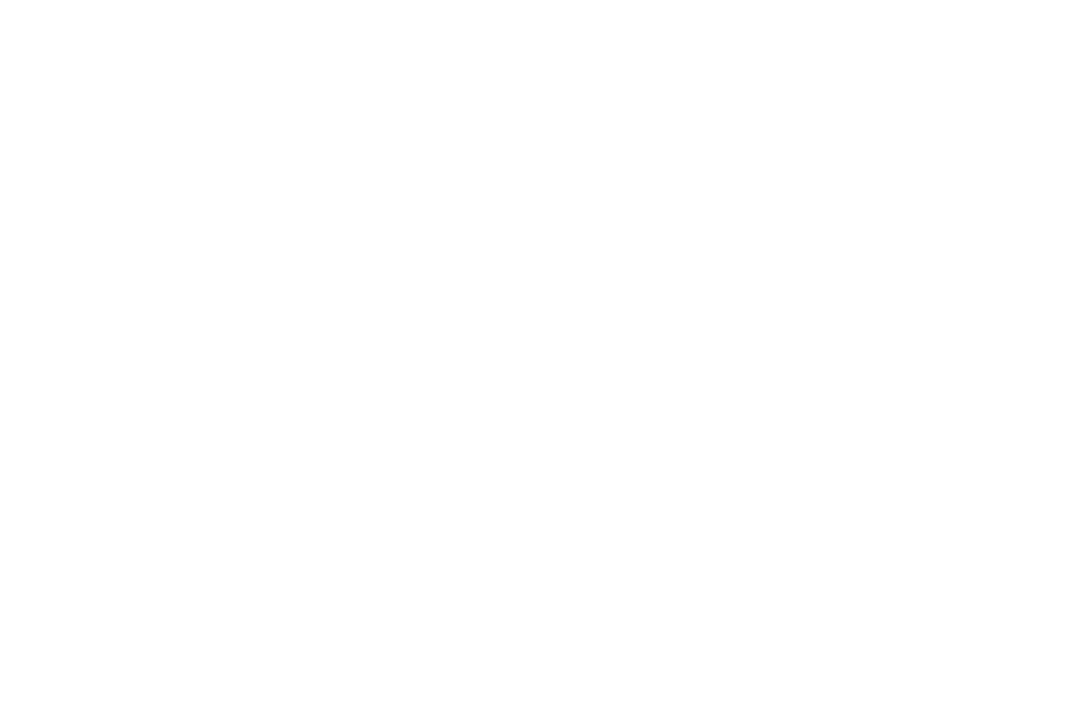

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


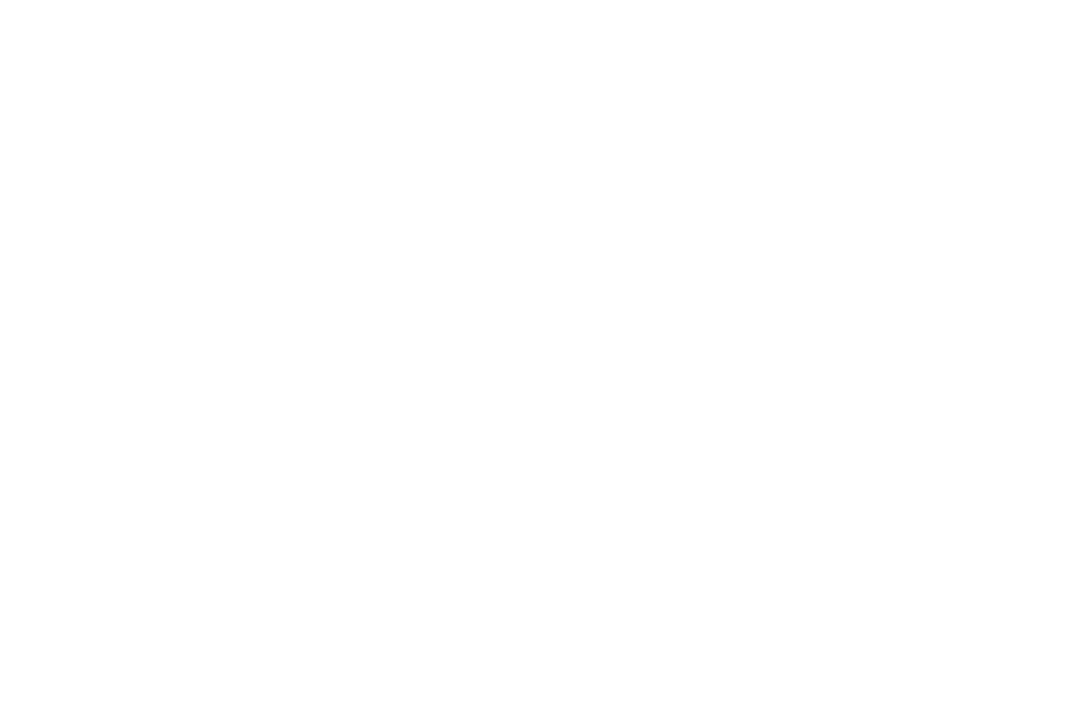

Traceback (most recent call last):
  File "/home/ayushi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/ayushi/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [239]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Theta Movement", fontsize=15)
ax.set_xlabel('theta0', fontsize=15)
ax.set_ylabel('theta1', fontsize=15)
ax.set_zlabel('theta2', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

graph = ax.scatter([], [], [], marker='o', c='r', s=15)
ax.set_xlim(np.amin(theta_all_new[:,0]), np.amax(theta_all_new[:,0]))
ax.set_ylim(np.amin(theta_all_new[:,1]), np.amax(theta_all_new[:,1]))
ax.set_zlim(np.amin(theta_all_new[:,2]), np.amax(theta_all_new[:,2]))
graph.set_alpha(1)
xdata, ydata, zdata = [], [], []

def animate(i):
    xdata.append(theta_all_new[i,0])
    ydata.append(theta_all_new[i,1])
    zdata.append(theta_all_new[i,2])
    graph._offsets3d = (xdata, ydata, zdata)
    return graph

anim = FuncAnimation(fig, animate, frames=np.arange(0, 200), interval=200, repeat_delay=3000, blit=False)
anim.save('plot_cost_lr_0.01.gif', writer='imagemagick')

# plt.ion()

# for i in range(theta_all_new.shape[0]):
#     ax.scatter(theta_all_new[i,0], theta_all_new[i,1], theta_all_new[i,2], c='r', marker='o', s=50)
#     plt.pause(0.02)
#     plt.draw()

In [ ]:
# def calc_y(x1, x2, theta, epsilon, points)
#     h_x = theta[0] +  points.x1*theta[1] + points.x2*theta[2]   
#     points.y = h_x + epsilon
#     return 

In [ ]:
# X1, X2 = np.meshgrid(x1, x2)
# Point = collections.namedtuple('Point', ['x1', 'x2', 'y'])
# points = [Point(x1, x2, y)]

# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title("Y function", fontsize=15)

# cost_error = np.array([calc_y(x1, x2, theta, points) 
#                for x0, x1 in zip(np.ravel(X1), np.ravel(X2))])
# cost_plot = cost_error.reshape(theta0.shape)


# Y_data = calc_y(X1, X2, )